In [1]:
import pytz
import datetime as dt

from helper.future_price_retriever import FuturePriceRetriever

start_date = 20100101
end_date = dt.datetime.now(pytz.timezone("Asia/Shanghai")).strftime("%Y%m%d")

# Example usage
symbols = ["RB", "HC"]
future_price_retriever = FuturePriceRetriever()

# Retrieve spread data
rb_hc_spread_df = future_price_retriever.get_spread_data(symbols)
rb_hc_spread_df

C:\Users\yanzh\AppData\Local\Programs\Python\Python313\Lib\site-packages\rqdatac\client.py:257: UserWarning: Your account will be expired after  29 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


,HC_prices,RB_prices,RB_HC_spread
date,,,
2015-01-05,36.00,62.00,26.00
2015-01-06,48.00,98.25,50.25
2015-01-07,39.50,102.75,63.25
2015-01-08,16.50,89.50,73.00
2015-01-09,-17.50,75.75,93.25
...,...,...,...
2025-01-16,3430.75,3308.25,-122.50
2025-01-17,3463.75,3349.00,-114.75
2025-01-20,3477.25,3364.00,-113.25


In [2]:
from helper.spread_data_processor import SpreadDataProcessor

lockback_period = 20
entry_threshold = 2
exit_threshold = 1

# Process the spread data
rb_hc_spread_processor = SpreadDataProcessor(rb_hc_spread_df)
rb_hc_processed_spread_df = rb_hc_spread_processor.compute_moving_statistics(window=lockback_period)
rb_hc_processed_spread_df

,HC_prices,RB_prices,RB_HC_spread,mean_20d,sd_20d,z_score_20d
date,,,,,,
2015-01-05,36.00,62.00,26.00,26.0000,NaN,NaN
2015-01-06,48.00,98.25,50.25,38.1250,17.147339,0.707107
2015-01-07,39.50,102.75,63.25,46.5000,18.906018,0.885961
2015-01-08,16.50,89.50,73.00,53.1250,20.343406,0.976975
2015-01-09,-17.50,75.75,93.25,61.1500,25.147440,1.276472
...,...,...,...,...,...,...
2025-01-16,3430.75,3308.25,-122.50,-117.0000,9.835154,-0.559218
2025-01-17,3463.75,3349.00,-114.75,-115.9125,8.702796,0.133578
2025-01-20,3477.25,3364.00,-113.25,-114.9625,7.817522,0.219059


In [3]:
from future_arb.mean_reversion import SpreadTradingStrategy

# Instantiate strategy
strategy = SpreadTradingStrategy()

# Generate signals
rb_hc_processed_signal_df = strategy.evaluate_binomial_signals(
    rb_hc_processed_spread_df, window=lockback_period, entry_threshold=2, exit_threshold=1
)
rb_hc_processed_signal_df

,HC_prices,RB_prices,RB_HC_spread,mean_20d,sd_20d,z_score_20d,SPREAD_SIGNAL
date,,,,,,,
2015-01-05,36.00,62.00,26.00,26.0000,NaN,NaN,0
2015-01-06,48.00,98.25,50.25,38.1250,17.147339,0.707107,0
2015-01-07,39.50,102.75,63.25,46.5000,18.906018,0.885961,0
2015-01-08,16.50,89.50,73.00,53.1250,20.343406,0.976975,0
2015-01-09,-17.50,75.75,93.25,61.1500,25.147440,1.276472,0
...,...,...,...,...,...,...,...
2025-01-16,3430.75,3308.25,-122.50,-117.0000,9.835154,-0.559218,0
2025-01-17,3463.75,3349.00,-114.75,-115.9125,8.702796,0.133578,0
2025-01-20,3477.25,3364.00,-113.25,-114.9625,7.817522,0.219059,0


In [4]:
# Calculate PnL
pnl_df = strategy.calculate_pnl(rb_hc_processed_signal_df, 1)
pnl_df

,HC_prices,RB_prices,RB_HC_spread,mean_20d,sd_20d,z_score_20d,SPREAD_SIGNAL,PNL,CUM_PNL,POSITION_HC,POSITION_RB
date,,,,,,,,,,,
2015-01-05,36.00,62.00,26.00,26.0000,NaN,NaN,0,0.0,0.0,0.0,0.0
2015-01-06,48.00,98.25,50.25,38.1250,17.147339,0.707107,0,0.0,0.0,0.0,-0.0
2015-01-07,39.50,102.75,63.25,46.5000,18.906018,0.885961,0,0.0,0.0,0.0,-0.0
2015-01-08,16.50,89.50,73.00,53.1250,20.343406,0.976975,0,0.0,0.0,0.0,-0.0
2015-01-09,-17.50,75.75,93.25,61.1500,25.147440,1.276472,0,0.0,0.0,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16,3430.75,3308.25,-122.50,-117.0000,9.835154,-0.559218,0,0.0,-407.5,0.0,-0.0
2025-01-17,3463.75,3349.00,-114.75,-115.9125,8.702796,0.133578,0,0.0,-407.5,0.0,-0.0
2025-01-20,3477.25,3364.00,-113.25,-114.9625,7.817522,0.219059,0,0.0,-407.5,0.0,-0.0


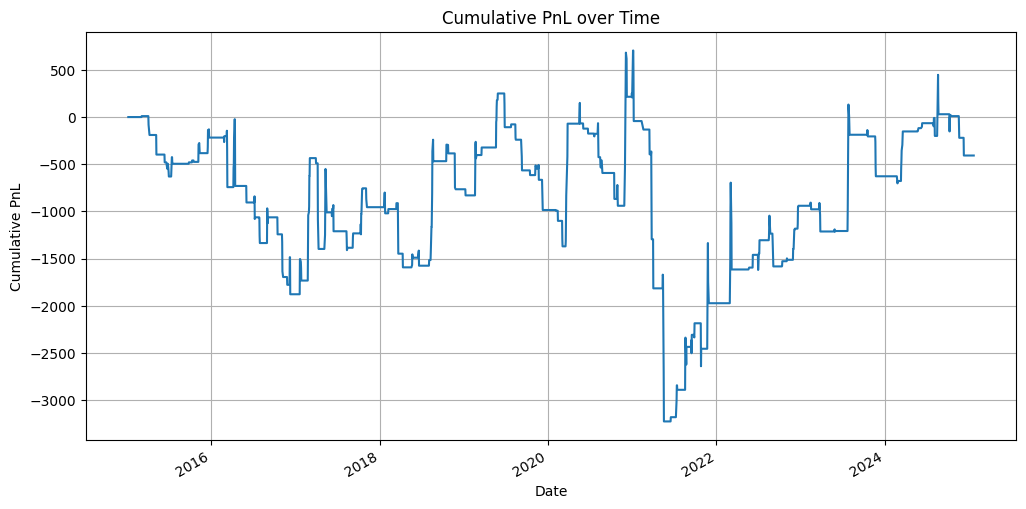

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
pnl_df["CUM_PNL"].plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Cumulative PnL over Time")
plt.grid(True)

In [6]:
# Generate z-score signals
rb_hc_continuous_signal_df = strategy.evaluate_z_score_signals(rb_hc_processed_spread_df, window=lockback_period)
rb_hc_continuous_signal_df

,HC_prices,RB_prices,RB_HC_spread,mean_20d,sd_20d,z_score_20d,Z_SCORE_SIGNAL
date,,,,,,,
2015-01-05,36.00,62.00,26.00,26.0000,NaN,NaN,NaN
2015-01-06,48.00,98.25,50.25,38.1250,17.147339,0.707107,-0.707107
2015-01-07,39.50,102.75,63.25,46.5000,18.906018,0.885961,-0.885961
2015-01-08,16.50,89.50,73.00,53.1250,20.343406,0.976975,-0.976975
2015-01-09,-17.50,75.75,93.25,61.1500,25.147440,1.276472,-1.276472
...,...,...,...,...,...,...,...
2025-01-16,3430.75,3308.25,-122.50,-117.0000,9.835154,-0.559218,0.559218
2025-01-17,3463.75,3349.00,-114.75,-115.9125,8.702796,0.133578,-0.133578
2025-01-20,3477.25,3364.00,-113.25,-114.9625,7.817522,0.219059,-0.219059


In [7]:
# Calculate PnL
z_score_pnl_df = strategy.calculate_z_score_pnl(rb_hc_processed_signal_df, hedge_ratio=1, entry_threshold=1, max_position_size=100)
z_score_pnl_df

,HC_prices,RB_prices,RB_HC_spread,mean_20d,sd_20d,z_score_20d,SPREAD_SIGNAL,PNL,CUM_PNL,NORMALIZED_Z_SCORE,Z_SCORE_POSITION_RB,Z_SCORE_POSITION_HC
date,,,,,,,,,,,,
2015-01-05,36.00,62.00,26.00,26.0000,NaN,NaN,0,0.000000,0.000000,NaN,0.000000,0.000000
2015-01-06,48.00,98.25,50.25,38.1250,17.147339,0.707107,0,0.000000,0.000000,0.707107,0.000000,0.000000
2015-01-07,39.50,102.75,63.25,46.5000,18.906018,0.885961,0,0.000000,0.000000,0.885961,70.710678,-70.710678
2015-01-08,16.50,89.50,73.00,53.1250,20.343406,0.976975,0,689.429112,689.429112,0.976975,88.596131,-88.596131
2015-01-09,-17.50,75.75,93.25,61.1500,25.147440,1.276472,0,1794.071644,2483.500755,1.000000,97.697505,-97.697505
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16,3430.75,3308.25,-122.50,-117.0000,9.835154,-0.559218,0,-7.958414,144272.672954,-0.559218,-41.380599,41.380599
2025-01-17,3463.75,3349.00,-114.75,-115.9125,8.702796,0.133578,0,-320.699641,143951.973313,0.133578,-55.921847,55.921847
2025-01-20,3477.25,3364.00,-113.25,-114.9625,7.817522,0.219059,0,-83.882770,143868.090543,0.219059,13.357777,-13.357777


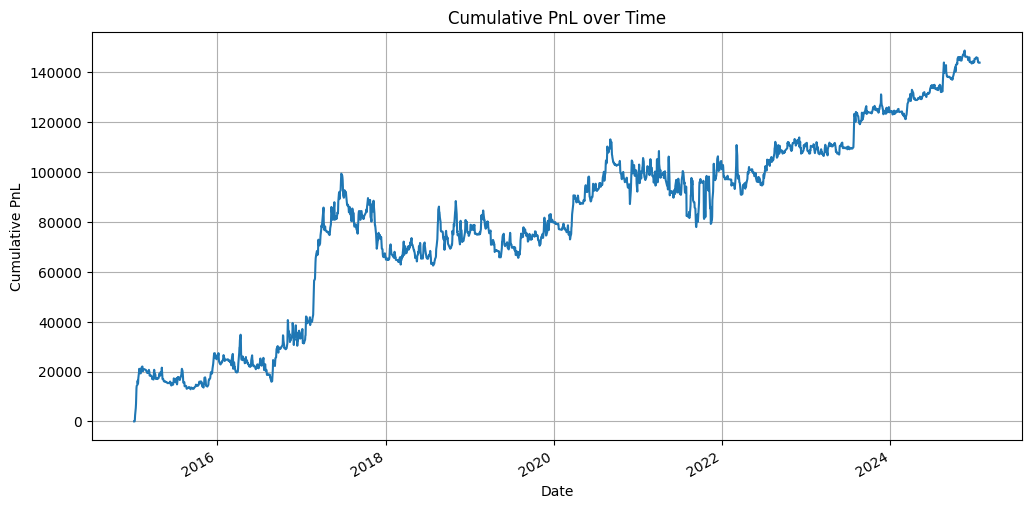

In [8]:
plt.figure(figsize=(12, 6))
z_score_pnl_df["CUM_PNL"].plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Cumulative PnL over Time")
plt.grid(True)

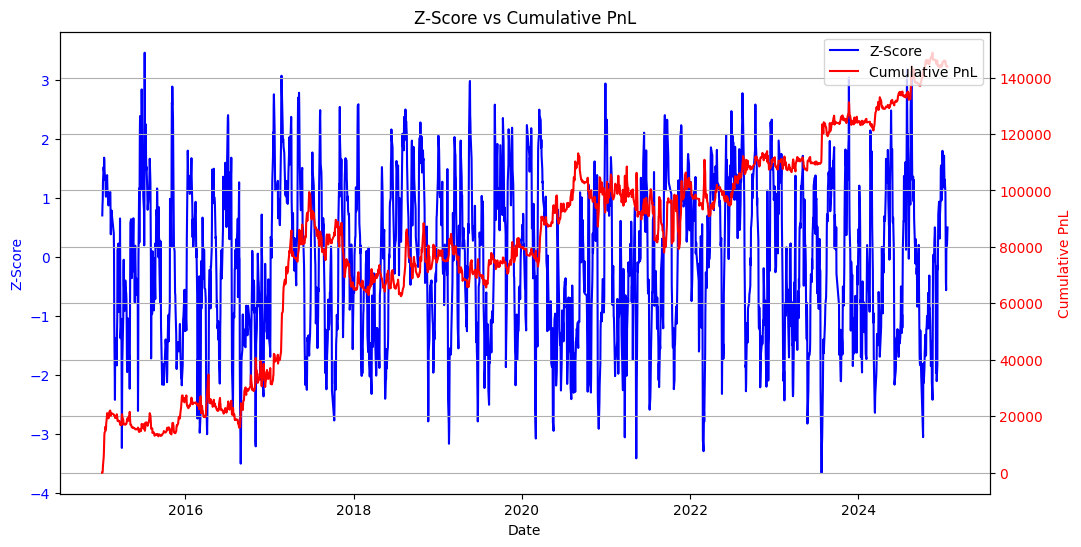

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot z-score on primary y-axis
ax1.plot(z_score_pnl_df.index, z_score_pnl_df['z_score_20d'], color='blue', label='Z-Score')
ax1.set_xlabel('Date')
ax1.set_ylabel('Z-Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for Cumulative PnL
ax2 = ax1.twinx()
ax2.plot(z_score_pnl_df.index, z_score_pnl_df['CUM_PNL'], color='red', label='Cumulative PnL')
ax2.set_ylabel('Cumulative PnL', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Z-Score vs Cumulative PnL')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.grid(True)

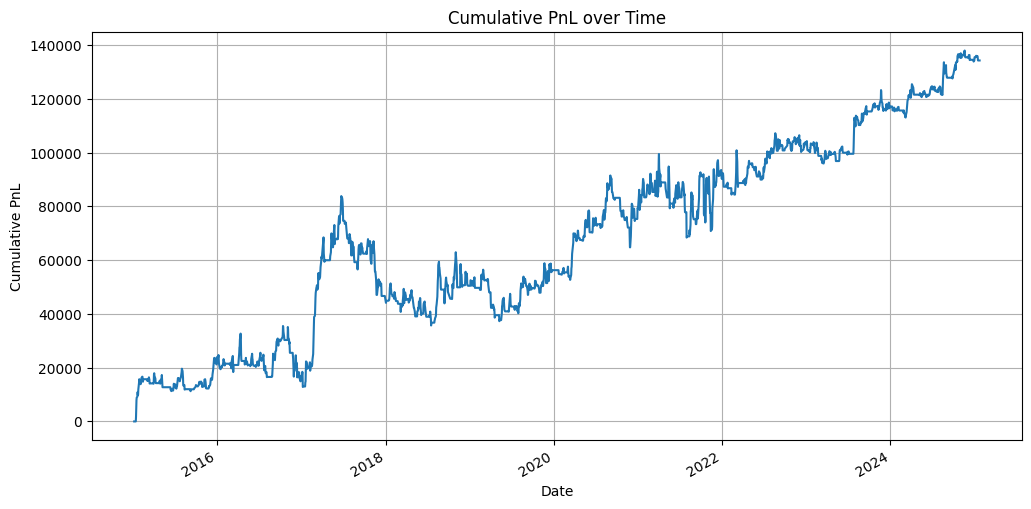

In [10]:
# Calculate PnL
cliping_z_score_pnl_df = strategy.calculate_cliping_z_score_pnl(rb_hc_processed_signal_df, hedge_ratio=1, entry_threshold=1, exit_threshold=0.5, max_position_size=100)
cliping_z_score_pnl_df

plt.figure(figsize=(12, 6))
cliping_z_score_pnl_df["CUM_PNL"].plot()
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.title("Cumulative PnL over Time")
plt.grid(True)

In [ ]:
cliping_z_score_pnl_df